# HOUSE PRICE PREDICTION
##### MULTIPLE LINEAR REGRESSION - GRADIENT DESCENT ALGO.

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=2)

## Loading Data

In [2]:
df = pd.read_csv(r"HOUSE_DATA_M2.csv")

In [3]:
df

,Size(sqft),Number of Bedrooms,Number of floors,Age of Home,Price($1000's)
0,952.0,2.0,1.0,65.0,271.5
1,1244.0,3.0,1.0,64.0,300.0
2,1947.0,3.0,2.0,17.0,509.8
3,1725.0,3.0,2.0,42.0,394.0
4,1959.0,3.0,2.0,15.0,540.0
...,...,...,...,...,...
95,1224.0,2.0,2.0,12.0,329.0
96,1432.0,2.0,1.0,43.0,388.0
97,1660.0,3.0,2.0,19.0,390.0
98,1212.0,3.0,1.0,20.0,356.0


## Preprocessing and EDA

In [4]:
df.rename(columns={df.columns[0]:"size",df.columns[1]:"beds",df.columns[2]:"floor",df.columns[3]:"age",df.columns[4]:"price"},inplace=True)
features = df.columns
print(features)

Index(['size', 'beds', 'floor', 'age', 'price'], dtype='object')


In [5]:
df

,size,beds,floor,age,price
0,952.0,2.0,1.0,65.0,271.5
1,1244.0,3.0,1.0,64.0,300.0
2,1947.0,3.0,2.0,17.0,509.8
3,1725.0,3.0,2.0,42.0,394.0
4,1959.0,3.0,2.0,15.0,540.0
...,...,...,...,...,...
95,1224.0,2.0,2.0,12.0,329.0
96,1432.0,2.0,1.0,43.0,388.0
97,1660.0,3.0,2.0,19.0,390.0
98,1212.0,3.0,1.0,20.0,356.0


In [6]:
f=len(df.columns)-1

x_train = np.array(df.iloc[:,:f]) # feature data
y_train = np.array(df.iloc[:,f]) # outcome data

    the data has been loaded now lets see how the feature datas are distributed

Text(0, 0.5, 'PRICE')

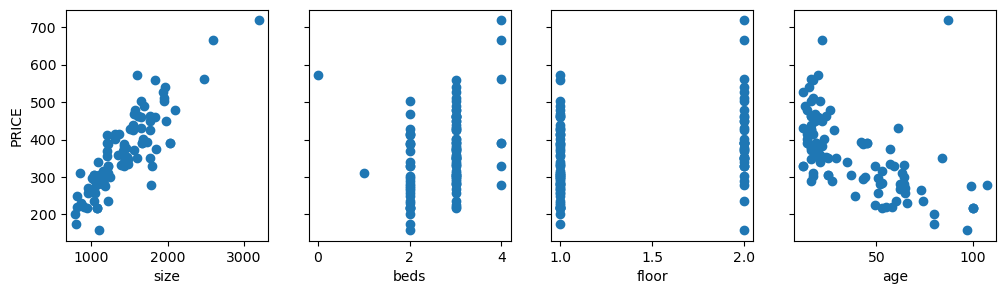

In [7]:
fig,ax=plt.subplots(1,f,figsize=(12,3),sharey=True)
for i in range(0,f):
    ax[i].scatter(x_train[:,i],y_train)
    ax[i].set_xlabel(features[i])
ax[0].set_ylabel("PRICE")


In [8]:
df.corr()

,size,beds,floor,age,price
size,1.000000,0.559600,0.601611,-0.270278,0.856714
beds,0.559600,1.000000,0.379457,-0.057138,0.290104
floor,0.601611,0.379457,1.000000,-0.199509,0.319732
age,-0.270278,-0.057138,-0.199509,1.000000,-0.575884
price,0.856714,0.290104,0.319732,-0.575884,1.000000


    with this we can say that no.of bedrooms and no.of floors don't make much impact on price. The size and age of house has more impact over the price, when size increases the price increases and when the age of house increases price decreases

    since the price is more influenced by the data of size and age the model will become more biased to 
    these features, therefore feature scaling need to be done.

In [9]:
mean_x = np.mean(x_train,axis=0) # mean
std_x = np.std(x_train,axis=0) # sigma
norm_x = (x_train-mean_x)
norm_x = norm_x/std_x

Text(0.5, 0.98, 'After scaling')

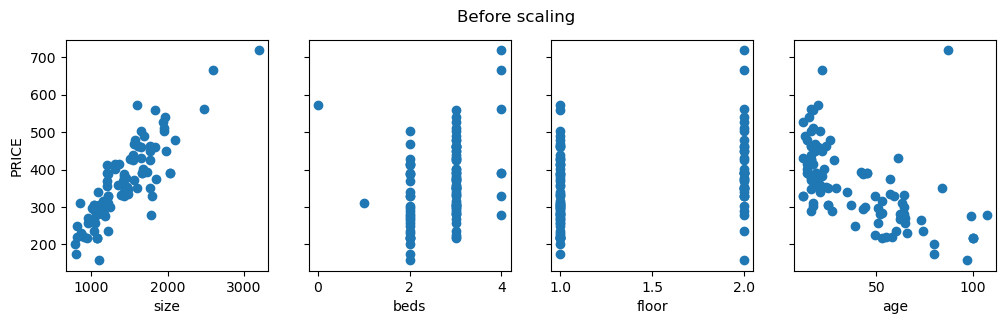

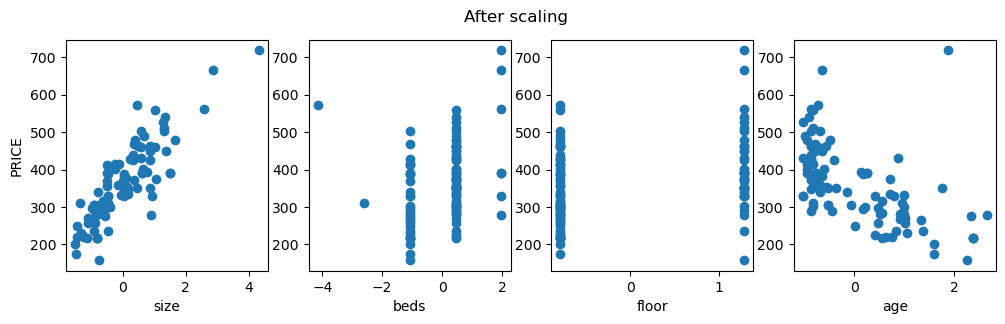

In [10]:
fig,ax=plt.subplots(1,f,figsize=(12,3),sharey=True)
for i in range(0,f):
    ax[i].scatter(x_train[:,i],y_train)
    ax[i].set_xlabel(features[i])
ax[0].set_ylabel("PRICE")
fig.suptitle(r"Before scaling")

fig,ax=plt.subplots(1,f,figsize=(12,3))
for i in range(0,f):
    ax[i].scatter(norm_x[:,i],y_train)
    ax[i].set_xlabel(features[i])
ax[0].set_ylabel("PRICE")
fig.suptitle(r"After scaling")




    Now, after scaling the features we brought the features scale ranging from -4 to 4.
    which now helps the model to predict faster and unbaised regarding the features

## Constructing model using Gradient Descent Algo.

In [11]:
m,n = x_train.shape
wl=[]
bl=[]
jl=[]

In [12]:
def linear_regression(w,b,x,y):
    y_pred = np.zeros(m)
    for i in range(0,m):
        y_pred[i] = np.dot(w,x[i])+b
#         for j in range(0,n):
#             y_pred[i,j] = np.dot(x[i,j],w[j])+b
    return y_pred
        

In [13]:
def cost_function(w,b,x,y,lamda):
    dj_dw = 0
    dj_db = 0
    cost  = 0
    reg_cost = 0
    for i in range(m):
        f_x = ((np.dot(x[i],w)+b)-y[i])**2
        cost += f_x
    for j in range(n):
        reg_cost += w[j]**2
    reg_cost = (reg_cost*lamda)/(2*m)
    cost = (f_x/(2*m))+reg_cost
    return cost

In [14]:
def gradient_function(w,b,x,y,lamda):
    dj_dw=np.zeros(n,)
    dj_db=0.0
    for i in range(m):
        f_x = (np.dot(x[i],w)+b)-y[i]
        for j in range(n):
            dj_dw[j] += (f_x*x[i,j])+((lamda*w[j])/m)      
        dj_db += f_x
    dj_dw = dj_dw/m
    dj_db = dj_db/m
    return dj_dw,dj_db
        

In [15]:
def compute_gradient(w,b,x,y,steps,A,lamda): 
    wl=[]
    bl=[]
    jl=[]
    for i in range(steps):
        dj_dw,dj_db = gradient_function(w,b,norm_x,y_train,lamda)
        w = w - A*dj_dw
        b = b - A*dj_db
        wl.append(w)
        bl.append(b)
        j = cost_function(w,b,x,y,lamda)
        jl.append(j)
    return w,b,j,wl,bl,jl

## Training the model

In [48]:
learning_rate = 3e-2 # 0.000000003
steps = 112 #500
w_in = np.zeros(n,)
b_in = 0.0
lamda = 0.000001
w,b,j,wl,bl,jl = compute_gradient(w_in,b_in,norm_x,y_train,steps,learning_rate,lamda)
print("weigth: ",w,"\nbias: ",b,"\nfinal cost: ",jl[-1])

weigth:  [ 83.69  -8.77 -15.96 -41.03] 
bias:  350.28780942842576 
final cost:  0.007864098813737475


## Analzing the model

Final cost attained:  0.007864098813737475


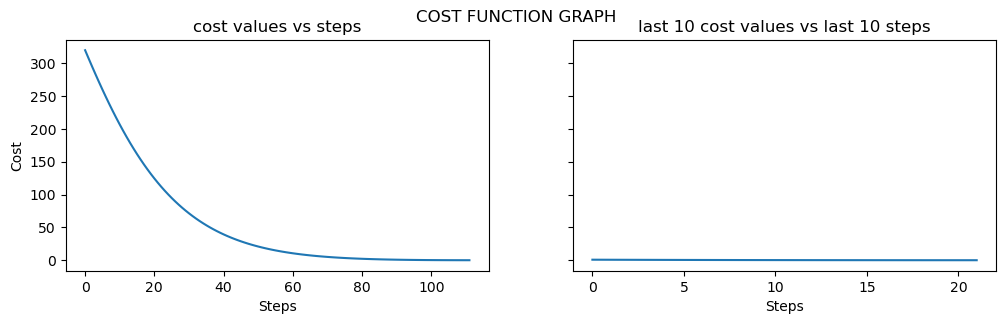

In [49]:
fig,ax = plt.subplots(1,2,figsize=(12,3),sharey = True)
ax[0].plot(jl)
ax[0].set_xlabel("Steps")
ax[0].set_ylabel("Cost")
ax[0].set_title("cost values vs steps")
ax[1].plot(jl[90:],)
ax[1].set_xlabel("Steps")
ax[1].set_title("last 10 cost values vs last 10 steps")
fig.suptitle("COST FUNCTION GRAPH")
print("Final cost attained: ",jl[-1])

    from the above visualization we can see that in the last 10 steps the cost isn't decreasing
    and has attain cost value of 0.007 which is very much close to zero. So the model has been trained well.

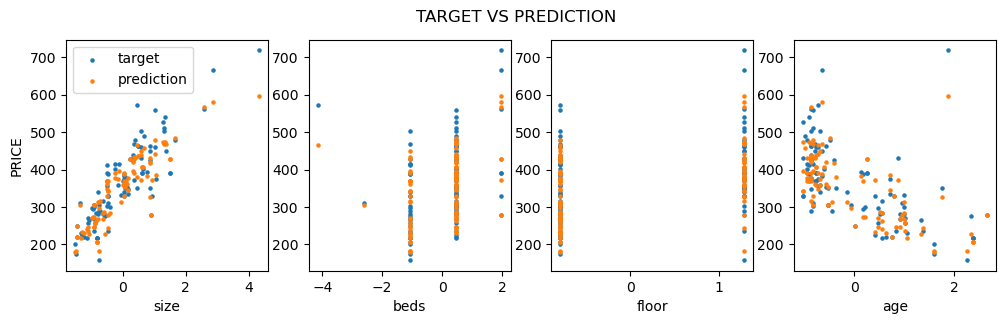

In [50]:
fig,ax = plt.subplots(1,f,figsize=(12,3))

y_pred =np.array(linear_regression(w,b,norm_x,y_train))
for i in range(f):
    ax[i].scatter(norm_x[:,i],y_train,s=5,label = 'target')
    ax[i].scatter(norm_x[:,i],y_pred,s=5,label = 'prediction')
    ax[i].set_xlabel(features[i])
ax[0].set_ylabel("PRICE")
ax[0].legend()
fig.suptitle("TARGET VS PREDICTION")
plt.show()

    Our model is trained with normalised features so our prediction is also normalised.
    that's why i have visualized the "target vs prediction" in normalized scale. 

In [51]:
ssr = np.sum((y_train - y_pred) ** 2)  # Sum of squared residuals
sst = np.sum((y_train - np.mean(y_train)) ** 2)  # Total sum of squares
r_squared = 1 - (ssr / sst)
print("Model accuracy: ",r_squared*100)

Model accuracy:  91.00418198810067


    model has an accuracy of 91.004 % which is pretty good and lets test it

## Testing

In [52]:
test = np.array([952.0,2.0,1.0,65.0])
test_norm = (test-mean_x)/std_x
print(test_norm)
norm_pred=np.dot(test_norm,w)+b
print(f"Actual Price of your house is: ${y_train[0]*1000:0.0f}")
print (f"Predicted Price of your house is: ${norm_pred*1000:0.0f}")


[-1.12 -1.09 -0.78  1.02]
Actual Price of your house is: $271500
Predicted Price of your house is: $236652


In [53]:
def model():
    print("ENTER THE REQUIRED FEATURES WHEN ASKED\n\n")
    size = float(input("Enter the Size: "))
    beds = float(input("Enter the No. of bedrooms: "))
    floor = float(input("Enter the NO.of Floors: "))
    age = float(input("Enter the age od the house: "))
    test = np.array([size,beds,floor,age])
    test_norm = (test-mean_x)/std_x
    print(test_norm)
    norm_pred = np.dot(test_norm,w)+b
    str_amount = str(int(norm_pred*1000))
    amount=""
    c=0
    for i in str_amount:
        if c%3 == 0 and c!=0:
            amount += ","
        amount += i
        c+=1
    print (f"\n\nPrice of your house is: $ {amount}/-")

## Prediction
    *now let's predict the users data

In [54]:
 model()

ENTER THE REQUIRED FEATURES WHEN ASKED


Enter the Size: 23
Enter the No. of bedrooms: 2
Enter the NO.of Floors: 3
Enter the age od the house: 23
[-3.37 -1.09  3.34 -0.61]


Price of your house is: $ 490,92/-


## Conclusion

    * the model will predict the outcome "PRICE" based on four features " SIZE,BEDROOMS,FLOORS,AGE " of the house.
    * this multiple linear regression model is bulid using the gradient descent algorithm
    * the model is predicting fine with an accuracy of 91.004% 
    * this model has regularised inorder to handle overfitting

#### 